<a href="https://www.kaggle.com/code/maoel31/titanic-disaster-machine-learning-decison-tree?scriptVersionId=115715949" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [193]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [195]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [196]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [197]:
print(train['Embarked'].unique())

['S' 'C' 'Q' nan]


In [198]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [199]:
train.drop(columns = ['Name','Ticket','Cabin'], inplace = True)
test.drop(columns = ['Name','Ticket','Cabin'], inplace = True)

In [200]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [201]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


# **PREPROCESSING**

In [202]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [203]:
print(test.isnull().sum())

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [204]:
mean_value_train_Age = train['Age'].mean()
mean_value_test_Age = test['Age'].mean()
mean_value_test_Fare = test['Fare'].mean()

In [205]:
train['Age'].fillna(value=mean_value_train_Age, inplace = True)
test['Age'].fillna(value=mean_value_test_Age, inplace = True)
test['Fare'].fillna(value=mean_value_test_Fare, inplace = True)

In [206]:
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

In [207]:
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64


In [208]:
print(test.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [209]:
print('Train duplicate check : ', train.duplicated().sum())
print('Test duplicate check  : ', test.duplicated().sum())

Train duplicate check :  0
Test duplicate check  :  0


In [210]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 62.8+ KB


In [211]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    int64  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 26.2+ KB


# **DATA VISUALIZATION**

<AxesSubplot:>

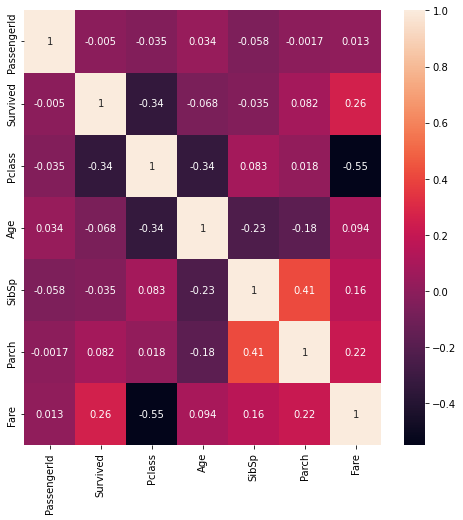

In [212]:
corr = train.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

<AxesSubplot:xlabel='Sex', ylabel='count'>

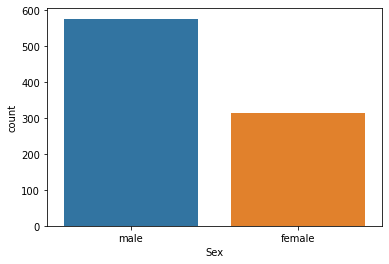

In [213]:
sns.countplot(x = 'Sex', data = train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

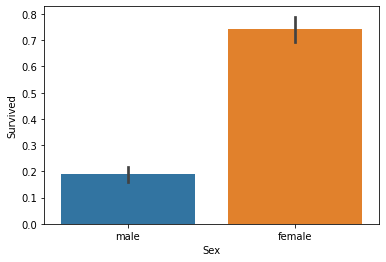

In [214]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

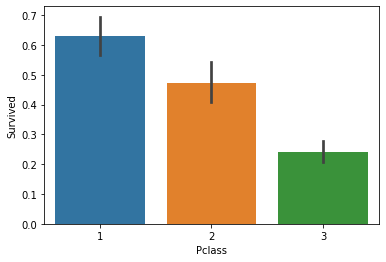

In [215]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

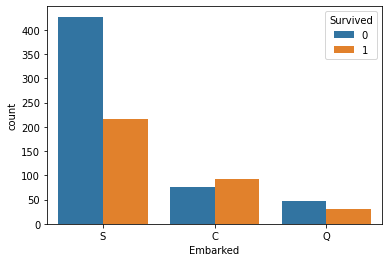

In [216]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = train)

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

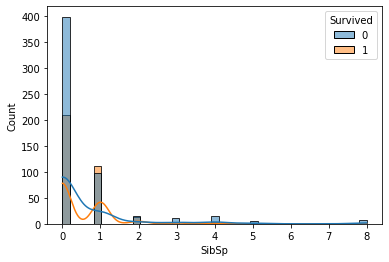

In [217]:
sns.histplot(x = 'SibSp', hue = 'Survived', data = train, kde = True)

In [218]:
print(train['SibSp'].unique())

[1 0 3 4 2 5 8]


<AxesSubplot:xlabel='Parch', ylabel='Count'>

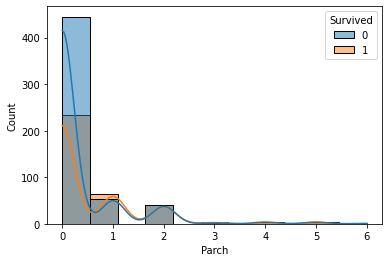

In [219]:
sns.histplot(x = 'Parch', hue = 'Survived', data = train, kde = True)

In [220]:
print(train['Parch'].unique())

[0 1 2 5 3 4 6]


<AxesSubplot:xlabel='Age', ylabel='Count'>

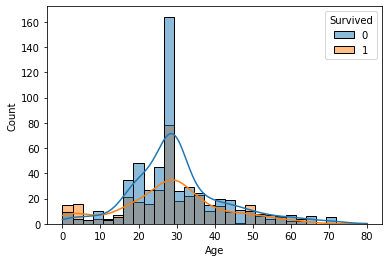

In [221]:
sns.histplot(x = 'Age', hue = 'Survived', data = train, kde = True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

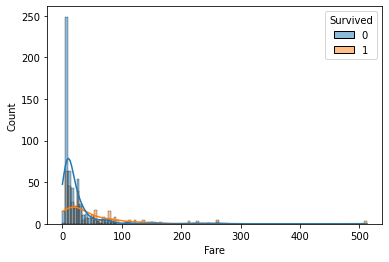

In [222]:
sns.histplot(x = 'Fare', hue = 'Survived', data = train, kde = True)

# **SPLITTING DATA**

In [223]:
x = train.drop('Survived', axis = 1)
y = train['Survived']

In [224]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [225]:
train = pd.get_dummies(train, prefix=['Sex', 'Embarked'])
test = pd.get_dummies(test, prefix=['Sex', 'Embarked'])

In [226]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22,1,0,7.2500,S
1,2,1,female,38,1,0,71.2833,C
2,3,3,female,26,0,0,7.9250,S
3,4,1,female,35,1,0,53.1000,S
4,5,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27,0,0,13.0000,S
887,888,1,female,19,0,0,30.0000,S
888,889,3,female,29,1,2,23.4500,S
889,890,1,male,26,0,0,30.0000,C


In [227]:
x = pd.get_dummies(x, prefix=['Sex', 'Embarked'])

In [228]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [229]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34,0,0,7.8292,0,1,0,1,0
1,893,3,47,1,0,7.0000,1,0,0,0,1
2,894,2,62,0,0,9.6875,0,1,0,1,0
3,895,3,27,0,0,8.6625,0,1,0,0,1
4,896,3,22,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30,0,0,8.0500,0,1,0,0,1
414,1306,1,39,0,0,108.9000,1,0,1,0,0
415,1307,3,38,0,0,7.2500,0,1,0,0,1
416,1308,3,30,0,0,8.0500,0,1,0,0,1


In [230]:
scaler = StandardScaler()

x = scaler.fit_transform(x)
test = scaler.transform(test)

In [231]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# **MODELLING**

In [232]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "gini", random_state=0, max_depth=3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [233]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0])

In [234]:
np.array(y_test)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0])

In [235]:
print('Accuracy Score : ', accuracy_score(y_pred, y_test))
print('F1 Score       : ', f1_score(y_pred, y_test))

Accuracy Score :  0.8547486033519553
F1 Score       :  0.7936507936507937


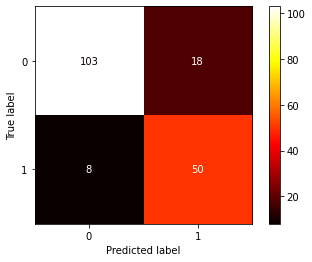

In [236]:
dt_cm = confusion_matrix(y_pred, y_test, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm,display_labels=dt.classes_)
disp.plot(cmap=plt.cm.hot)
plt.show()   

In [237]:
print("Classification report matrix : \n", classification_report(y_pred, y_test))

Classification report matrix : 
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       121
           1       0.74      0.86      0.79        58

    accuracy                           0.85       179
   macro avg       0.83      0.86      0.84       179
weighted avg       0.87      0.85      0.86       179



In [238]:
test_prediction = dt.predict(test)

In [239]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [240]:
submission['Survived'] = test_prediction
submission.to_csv('submission.csv', index = False)
pd.read_csv('submission.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
